# **Introduction to matplotlib**

Welcome to the **Matplotlib Beginner Customization Tutorial**. This tutorial is designed for beginners to learn how to use Matplotlib for basic data visualization.

## Learning Objectives

By the end of this tutorial, you will be able to:
- Understand the difference between matplotlib's stateful and object-oriented APIs
- Create and customize basic plot types (line, scatter, bar, histogram)
- Add elements like titles, labels, legends, and annotations to plots
- Work with multiple plots in a grid layout
- Apply styles and themes to your visualizations
- Save your plots in different formats


We will use the **Seaborn `flights` dataset**, which contains monthly airline passenger numbers from 1949 to 1960.

💡 For hands-on practice, check out the exercises notebook: [01 - Introduction to matplotlib - exercises](<01 - Introduction to matplotlib - exercises.ipynb>)

In [1]:
# load the required libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# reset the matplotlib default settings, required to
# re-run the code without restarting the kernel because
# we will later change some of the settings
mpl.rcdefaults()

In [2]:
# Load the flights dataset
flights = sns.load_dataset("flights")
print(flights.info())

<class 'pandas.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB
None


In [3]:
flights.head(3)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132


In [4]:
# add a period column for plotting along time
# make sure to use the format "%Y-%b" matching the given data: 1949-Feb, 1949-Mar, etc.
flights["period"] = pd.to_datetime(
    flights["year"].astype(str) + "-" + flights["month"].astype(str), format="%Y-%b"
)
flights.head(3)

,year,month,passengers,period
0,1949,Jan,112,1949-01-01
1,1949,Feb,118,1949-02-01
2,1949,Mar,132,1949-03-01


In [5]:
# aggregate by year
df_yearly = flights.groupby("year")["passengers"].sum().reset_index()
df_yearly.head(3)

,year,passengers
0,1949,1520
1,1950,1676
2,1951,2042


In [6]:
# aggregate by month (across years!)
df_monthly = flights.groupby("month", observed=True)["passengers"].mean().reset_index()
df_monthly.head(3)

,month,passengers
0,Jan,241.750000
1,Feb,235.000000
2,Mar,270.166667


Matplotlib is a **powerful visualization library** that allows you to create static, animated, and interactive plots in Python.

There are two major approaches to creating plots with matplotlib (APIs)
- **Stateful (`plt`)**: Simplified interface for quick plotting.
- **Object-Oriented (`fig, ax`)**: Recommended for better control and multiple subplots.


## 1. Quick plots using the stateful *plt* API

### 1.1. Simple line plot

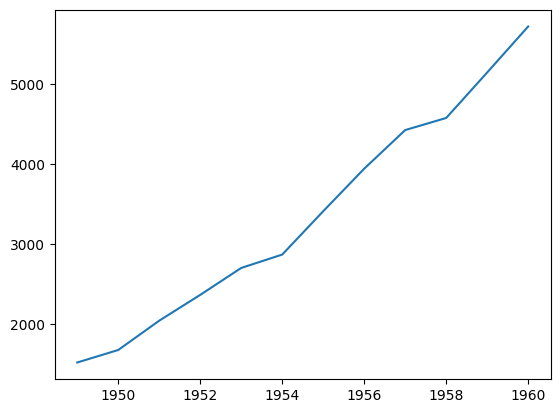

In [7]:
# plt.plot will create a line chart without markers, by default
plt.plot(df_yearly["year"], df_yearly["passengers"])

### 1.2. Line Plot with markers

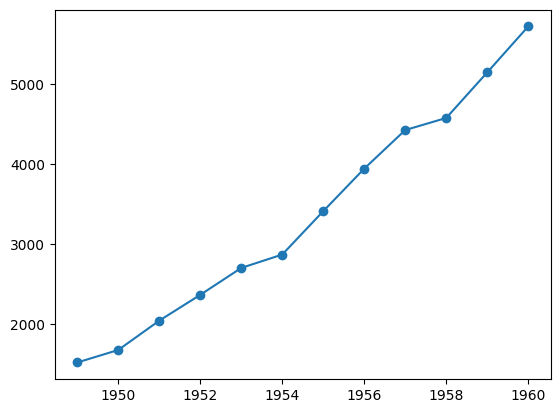

In [8]:
# when markers are specified, they are added to the line chart
plt.plot(df_yearly["year"], df_yearly["passengers"], marker="o")

### 1.3. Dot-Plot (scatter plot)

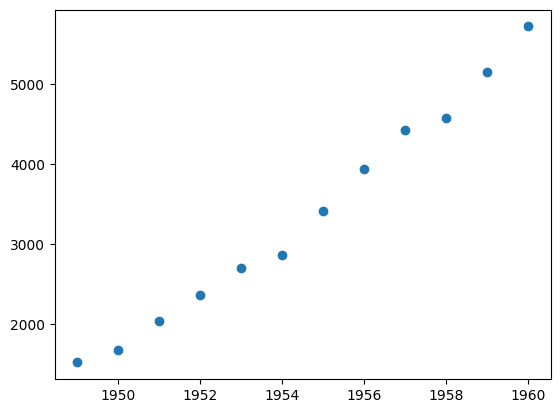

In [9]:
# specifying an empty linestyle will produce the markers only (a scatter plot)
plt.plot(df_yearly["year"], df_yearly["passengers"], marker="o", linestyle="")

### 1.4 Changing the plot in-place, adding title and axis labels

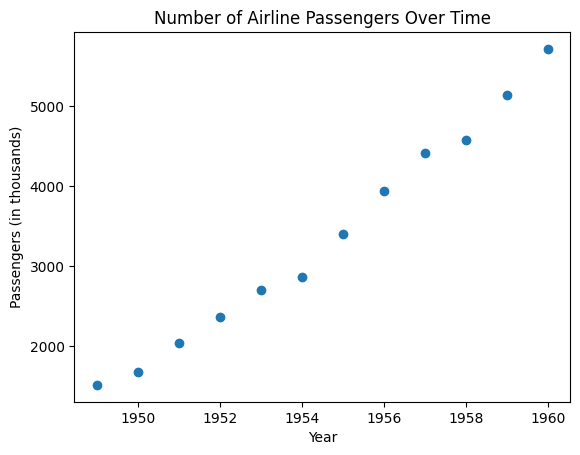

In [10]:
# stateful means that the plot is modified in place until it is shown
plt.plot(df_yearly["year"], df_yearly["passengers"], marker="o", linestyle="")
# add title and axis labels
plt.title("Number of Airline Passengers Over Time")
plt.xlabel("Year")
plt.ylabel("Passengers (in thousands)")
plt.show()

### 1.5. Adding a second plot in the same chart

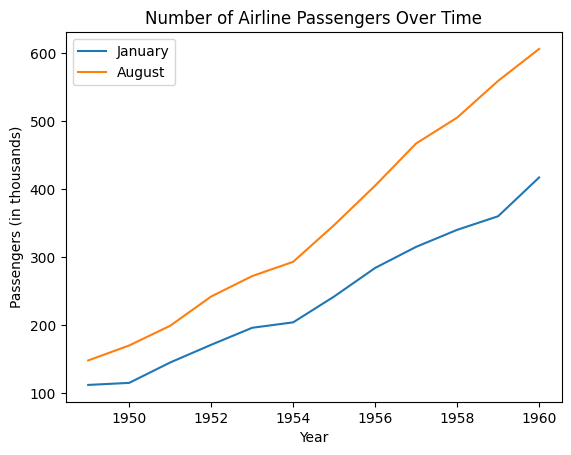

In [11]:
# Plot two series in the same chartplt.plot(yearly_passengers["year"], yearly_passengers["passengers"])
# first: passengers in January across years
plt.plot(
    flights[flights["month"] == "Jan"]["year"],
    flights[flights["month"] == "Jan"]["passengers"],
)
# second: passengers in August across years
plt.plot(
    flights[flights["month"] == "Aug"]["year"],
    flights[flights["month"] == "Aug"]["passengers"],
)
# add a legend
plt.legend(["January", "August"])
# add title and axis labels
plt.title("Number of Airline Passengers Over Time")
plt.xlabel("Year")
plt.ylabel("Passengers (in thousands)")
plt.show()

## 2. More control via the object oriented API

The object-oriented approach allows for more customization.

At the core of Matplotlib is the **Figure-Axes structure**:

- A **Figure** is the overall container for everything.
- Inside a Figure, you have one or more **Axes**, which are the actual plotting areas.
- The **Axes** contain everything from **lines, markers, text, grid lines, and labels**.

Let's start by recreating the previous plot

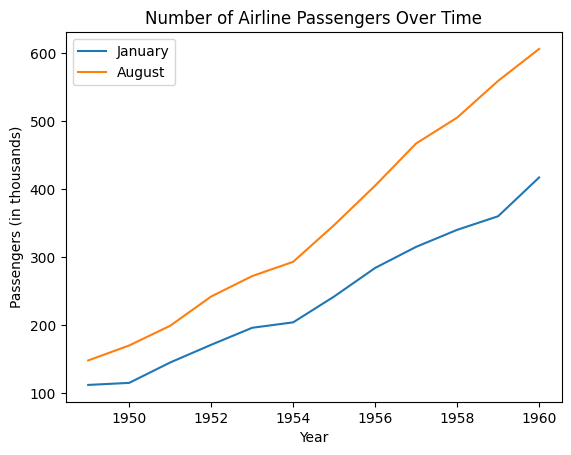

In [12]:
# Step 1: Create a figure and an axis
fig, ax = plt.subplots()

# Step 2: Plot two lines in the same chart
# first: passengers in January across years
ax.plot(
    flights[flights["month"] == "Jan"]["year"],
    flights[flights["month"] == "Jan"]["passengers"],
    label="January",  # this time, directly provide label for use in legend
)
# second: passengers in August across years
ax.plot(
    flights[flights["month"] == "Aug"]["year"],
    flights[flights["month"] == "Aug"]["passengers"],
    label="August",  # this time, directly provide label for use in legend
)

# Step 3: Modify the plot
ax.set_title("Number of Airline Passengers Over Time")
ax.set_xlabel("Year")
ax.set_ylabel("Passengers (in thousands)")
ax.legend()

# Step 4: Show the figure
plt.show()

> **Note**: `plt.show()` is actually part of the stateful API. Here, we use it at the end of the cell to have more control over when the figure is rendered.
>
> In a Jupyter notebook, you can also just return `fig` at the end of the cell to display it. But in many cases this will duplicate the output, if we have modified the figure in place before. At the same time, not finishing we `fig` would often add text output from the last modification command, which is not desired.
>
> A somewhat more elaborate way to display the figure in a notebook without relying on the stateful API is to use `IPython.display.display()` in combination with `plt.close(fig)` to prevent duplicate output while sticking with the object-oriented API. e.g.:

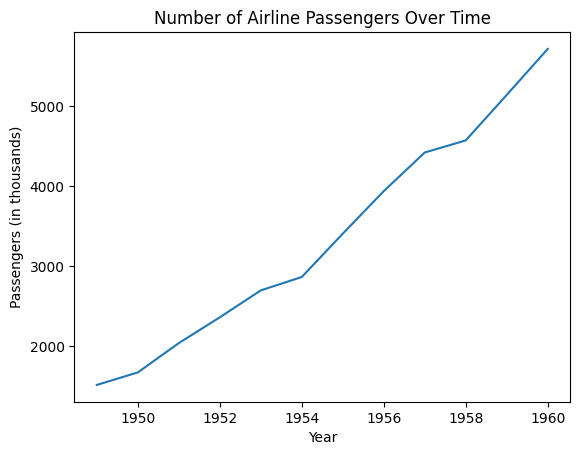

In [13]:
import IPython.display as ipydisplay

fig, ax = plt.subplots()
ax.plot(
    df_yearly["year"],
    df_yearly["passengers"],
)
ax.set_title("Number of Airline Passengers Over Time")
ax.set_xlabel("Year")
ax.set_ylabel("Passengers (in thousands)")
# Explicitly display the Figure in the notebook (no reliance on pyplot global state).
ipydisplay.display(fig)
# Prevent duplicate inline output in some frontends
plt.close(fig)

## **3. Basic Plot Types in Matplotlib**
Matplotlib supports multiple types of visualizations. Here are some of the most commonly used:

- **Line Plot**: Useful for showing trends over time.
- **Scatter Plot**: Ideal for visualizing relationships between two variables.
- **Bar Plot**: Great for comparing categories.
- **Histogram**: Used for understanding the distribution of numerical data.

Let's go through these one by one.

### 3.1 Line Plot
A **line plot** is useful for showing trends over time. We will create a line plot showing the number of airline passengers per year.

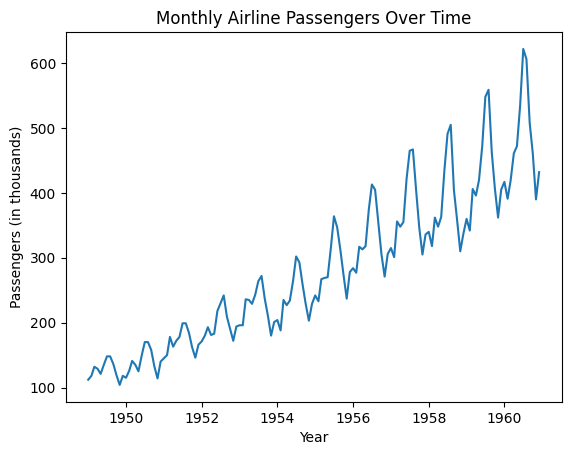

In [14]:
# Create a simple line plot
fig, ax = plt.subplots()
ax.plot(
    flights["period"],
    flights["passengers"],
)
ax.set_title("Monthly Airline Passengers Over Time")
ax.set_xlabel("Year")
ax.set_ylabel("Passengers (in thousands)")
plt.show()

### 3.2 Scatter Plot
A **scatter plot** is useful for visualizing relationships between two numerical variables. We will compare the number of passengers with the corresponding month.

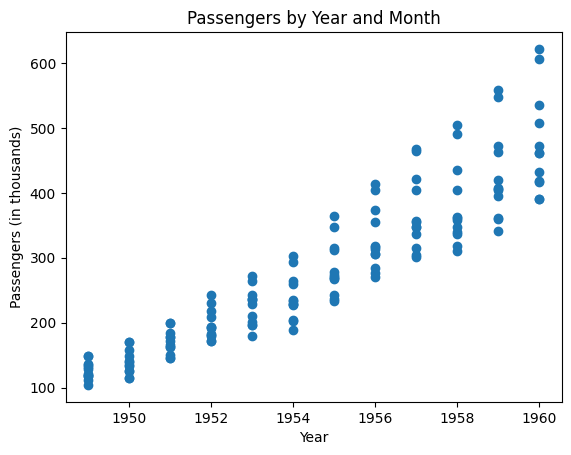

In [15]:
# Create a scatter plot
fig, ax = plt.subplots()
ax.scatter(flights["year"], flights["passengers"])
ax.set_title("Passengers by Year and Month")
ax.set_xlabel("Year")
ax.set_ylabel("Passengers (in thousands)")
plt.show()

### 3.3 Bar Plot
A **bar plot** is useful for comparing different categories. We will visualize the **average number of passengers per month** using a bar plot.

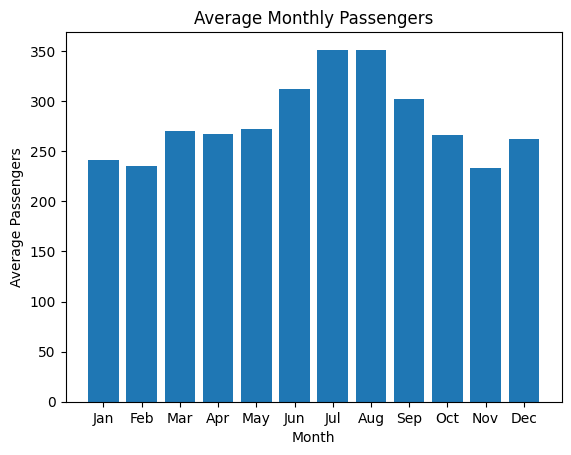

In [16]:
# Create a vertical bar plot
fig, ax = plt.subplots()
ax.bar(
    df_monthly["month"],
    df_monthly["passengers"],
)
ax.set_title("Average Monthly Passengers")
ax.set_xlabel("Month")
ax.set_ylabel("Average Passengers")
plt.show()

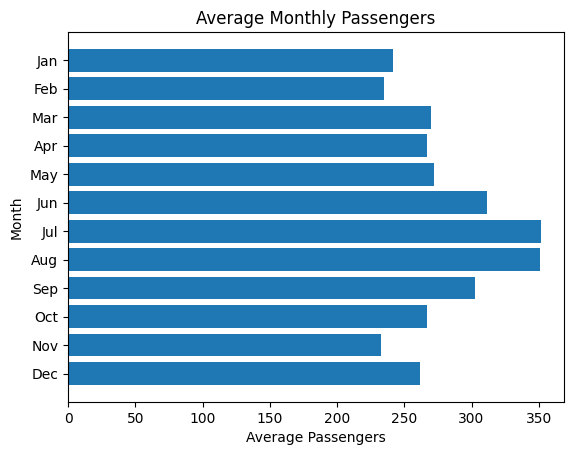

In [17]:
# Create a horizontal bar plot with reversed y-axis order
fig, ax = plt.subplots()
ax.barh(
    df_monthly["month"],
    df_monthly["passengers"],
)
ax.set_title("Average Monthly Passengers")
ax.set_xlabel("Average Passengers")
ax.set_ylabel("Month")
ax.invert_yaxis()  # reverse the order of the y-axis
plt.show()

### 3.4 Histogram
A **histogram** is useful for understanding the distribution of a numerical variable. We will visualize the distribution of the number of passengers across all years.

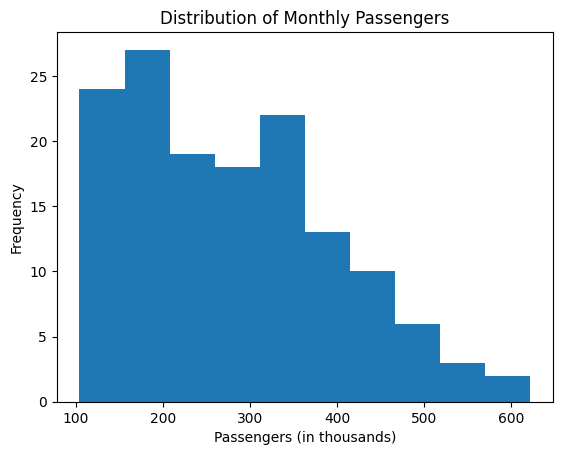

In [18]:
# Create a histogram
fig, ax = plt.subplots()
ax.hist(flights["passengers"])
ax.set_title("Distribution of Monthly Passengers")
ax.set_xlabel("Passengers (in thousands)")
ax.set_ylabel("Frequency")
plt.show()

### Exercise: Basic Plot Types

In this exercise we use the `penguins` dataset from the `seaborn` library:

`penguins = sns.load_dataset("penguins")`

1. Load the `penguins` dataset, display the first 3 rows, investigate the .`info()`.
2. Using the stateful *plt* API: Create a scatter plot showing the relationship between `bill_length_mm` and `bill_depth_mm`.
3. Improve the plot by adding a title and axis labels.
4. Use a different color for each `species` in the scatter plot.
5. Use the object-oriented API produce the same graph as in the previous task
6. Create a histogram of the `flipper_length_mm` column with 20 bins.
7. Create a bar plot showing the average `body_mass_g` for each `species`.

## 4. Customization via arguments to the plotting methods

Depending on the kind of plot, there are different arguments to the respective plotting method.

For example, scatter(), bar(), and hist() have different arguments support:
* color: the color of the markers
* alpha: the transparency of the markers
* edgecolors: the color of the marker edges

For a list of named colors available see [here](https://matplotlib.org/stable/gallery/color/named_colors.html)

### 4.1. Customizing scatter() plots
More specific arguments for scatter() include:
* s: the size of the markers (in points, e.g. 20)
* marker: the marker style (e.g. 'o' for circles, '^' for triangles)


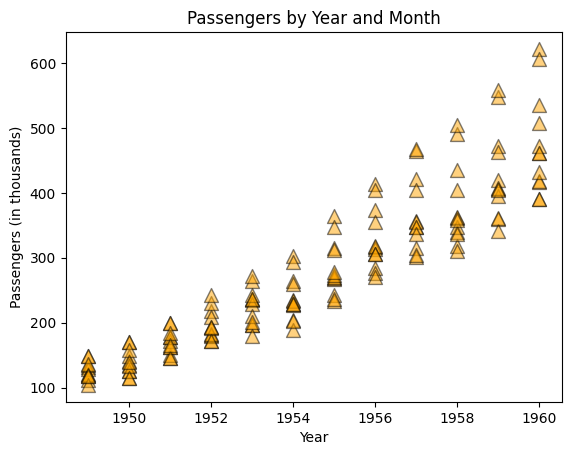

In [19]:
# Customizing a scatter plot
fig, ax = plt.subplots()
ax.scatter(
    flights["year"],
    flights["passengers"],
    color="orange",
    alpha=0.5,
    edgecolors="black",
    s=100,
    marker="^",
)
ax.set_title("Passengers by Year and Month")
ax.set_xlabel("Year")
ax.set_ylabel("Passengers (in thousands)")
plt.show()

### 4.2. Customizing bar() plots

More specific arguments for bar() include:
* width: the width of the bars
* align: the alignment of the bars, e.g. 'center' or 'edge'


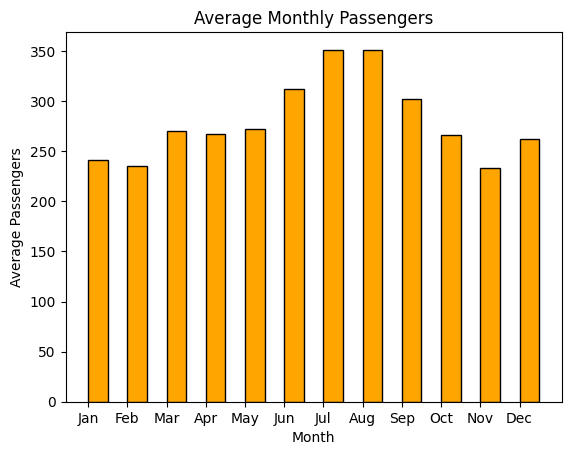

In [20]:
# Create a bar plot
fig, ax = plt.subplots()
ax.bar(
    df_monthly["month"],
    df_monthly["passengers"],
    color="orange",
    edgecolor="black",
    width=0.5,
    align="edge",
)
ax.set_title("Average Monthly Passengers")
ax.set_xlabel("Month")
ax.set_ylabel("Average Passengers")
plt.show()

### 4.1. Customizing hist() plots

More specific arguments for hist() include:
* bins: the number of bins to use
* histtype: the type of histogram to plot, e.g. 'bar' or 'step'

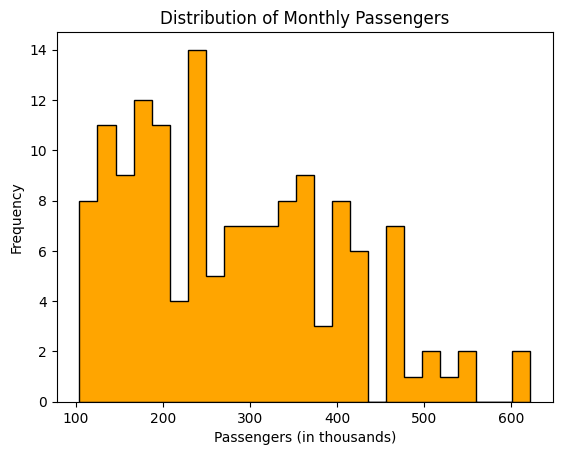

In [21]:
# Create a histogram
fig, ax = plt.subplots()
ax.hist(
    flights["passengers"],
    bins=25,
    histtype="stepfilled",
    edgecolor="black",
    color="orange",
)
ax.set_title("Distribution of Monthly Passengers")
ax.set_xlabel("Passengers (in thousands)")
ax.set_ylabel("Frequency")
plt.show()

## 5. Further customization via ax and fig

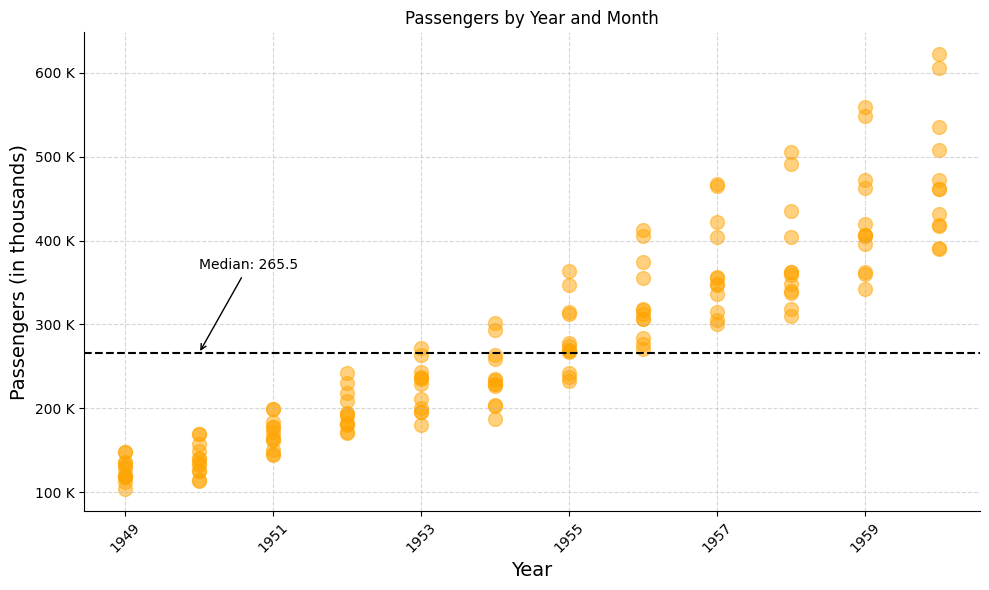

In [22]:
# Customizing a scatter plot
fig, ax = plt.subplots()
ax.scatter(
    flights["year"],
    flights["passengers"],
    color="orange",
    alpha=0.5,
    s=100,
    marker="o",
)
ax.set_title("Passengers by Year and Month")
# add gridlines
ax.grid(visible=True, linestyle="--", alpha=0.5)
# use only every second year on the x-axis
ax.set_xticks(flights["year"].unique()[::2])
# change the rotation of ticks on the x-axis
ax.set_xticklabels(flights["year"].unique()[::2], rotation=45)
# add a horizontal line at the median
median_value = flights["passengers"].median()
ax.axhline(median_value, color="black", linestyle="--")
# add an annotation for the median passenger value
ax.annotate(
    f"Median: {median_value}",
    xy=(1950, median_value),
    xytext=(1950, median_value + 100),
    arrowprops={"arrowstyle": "->"},
)
# change the formatting of the major tick labels on the y-axis
ax.yaxis.set_major_formatter("{x:,.0f} K")
# removing the spines on top and right side
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
# change the font size on the axis names
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Passengers (in thousands)", fontsize=14)
# fig can be used to change the size of the figure
fig.set_size_inches(10, 6)
# also, the layout can be adjusted
fig.tight_layout()
plt.show()

The following **Anatomy of a matplotlib figure** from the [matplotlib documentation](https://matplotlib.org/stable/gallery/showcase/anatomy.html) shows some more examples on how to access or change parts of a plot:

![anatomy](<Anatomy of a figure.svg>)

## **6. Using `rcParams` and Stylesheets for Unified Styling**
So far, we've customized each plot individually. To apply **consistent styling across all plots**, we can use `rcParams` or stylesheets.

* **Use `rcParams` to define default settings for all plots**. See [here](https://matplotlib.org/stable/api/matplotlib_configuration_api.html#matplotlib.rcParams) for a list of rcParams available.
* **Use stylesheets (`plt.style.use()`) to apply pre-built or custom themes**.

You can also use one of the pre-defined styles from matplotlib, see here:
[https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html)

In [23]:
# display available styles
mpl.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [24]:
# Start with one of the pre-defined styles
mpl.style.use("seaborn-v0_8-white")
# Applying global style settings
mpl.rcParams["axes.spines.top"] = False
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.bottom"] = True
mpl.rcParams["axes.spines.left"] = True
mpl.rcParams["axes.edgecolor"] = "lightgrey"
mpl.rcParams["axes.titlesize"] = 14
mpl.rcParams["axes.labelsize"] = 12
mpl.rcParams["xtick.labelsize"] = 10
mpl.rcParams["ytick.labelsize"] = 10
# add a very thin and light grid
mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "whitesmoke"

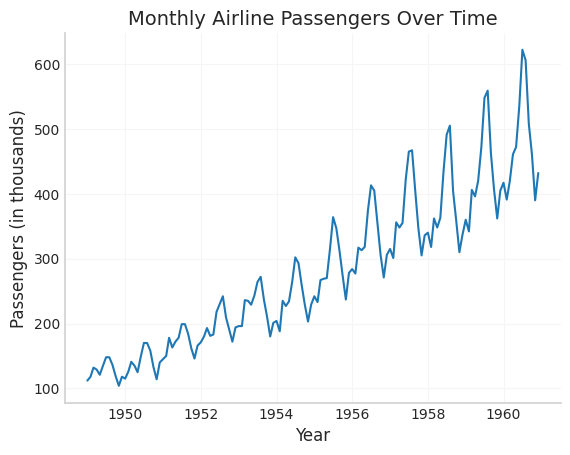

In [25]:
fig, ax = plt.subplots()
ax.plot(
    flights["period"],
    flights["passengers"],
)
ax.set_title("Monthly Airline Passengers Over Time")
ax.set_xlabel("Year")
ax.set_ylabel("Passengers (in thousands)")
plt.show()

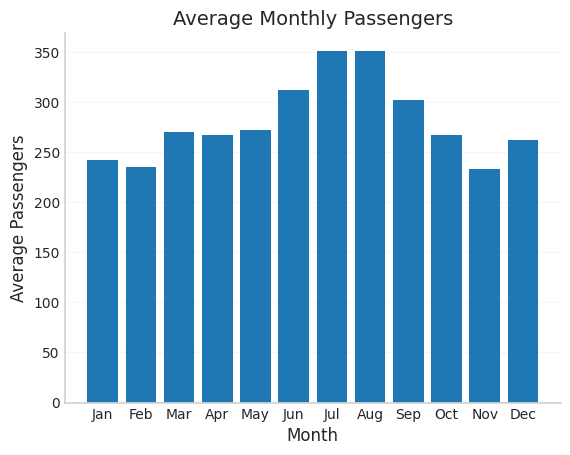

In [26]:
fig, ax = plt.subplots()
ax.bar(
    df_monthly["month"],
    df_monthly["passengers"],
    align="center",
)
ax.set_title("Average Monthly Passengers")
ax.set_xlabel("Month")
ax.set_ylabel("Average Passengers")
# override our global grid setting here
ax.grid(visible=False, axis="x")
plt.show()

### Exercise: Customization of plots
We use the `penguins` dataset.
1. Re-create the scatter plot from the previous exercise using the object-oriented API, including the title and axis labels, using a different color for each species.
2. Using arguments to the plotting method:
* change the marker style to an empty circle for all species
* make the markers half-transparent.
* decrease the marker size to 10.
3. Using the ax object:
* add a grid
* rotate the X-axis labels by 45 degrees
* change the font size of the axis labels
* add a vertical line at the median value of `bill_length_mm`
* add a horizontal line at the median value of `bill_depth_mm`
* add an annotations to both median reference lines
* remove the top and right spines
4. Apply the `seaborn-v0_8-white` style to the plot.

## **7. Several plots in a grid**

Matplotlib can display multiple plots in a grid.

For this, we will use a different dataset that is shipped with seaborn. Let's explore first:

In [27]:
tips = sns.load_dataset("tips")
tips.info()

<class 'pandas.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [28]:
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [29]:
pd.crosstab(tips["smoker"], tips["sex"])

sex,Male,Female
smoker,,
Yes,60,33
No,97,54


We are going to investigate the relation between *total_bill* and *tip* separately for each combination of *sex* and *smoker*.

By convention, we are going to use *axes* as object name for the return value of plt.subplots, in this case, because we create a two-dimensional grid with more than one row and more than one column. Here is an overview of the usual naming conventions:

| Name  | Usage Scenario | Example |
|--------|----------------|----------|
| `ax`  | Single subplot | `fig, ax = plt.subplots()` |
| `axs` | 1D array (single row or column) | `fig, axs = plt.subplots(1, 3)` |
| `axes` | 2D array (grid layout) | `fig, axes = plt.subplots(2, 2)` |


### 7.1. Creating a 2x2 grid of group-specific subplots

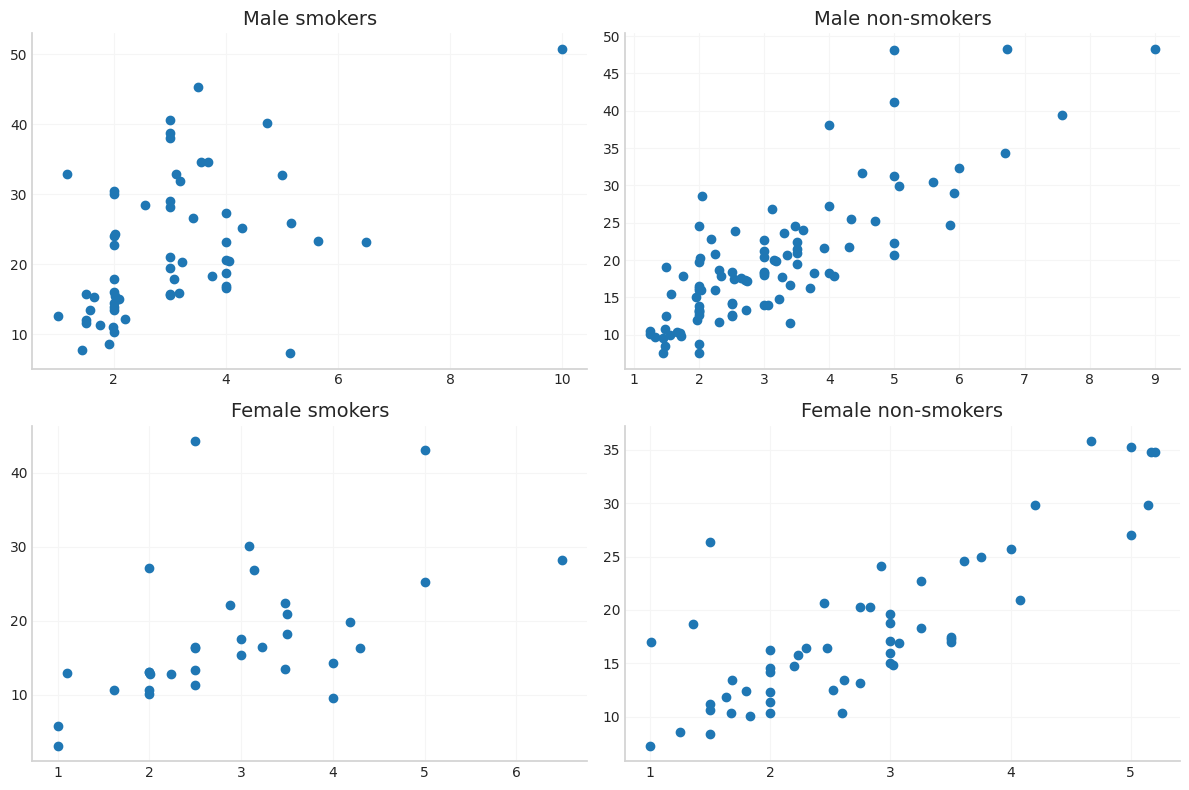

In [30]:
# Creating a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].set_title("Male smokers")
sub_df = tips[(tips["sex"] == "Male") & (tips["smoker"] == "Yes")]
axes[0, 0].scatter(sub_df["tip"], sub_df["total_bill"])

axes[0, 1].set_title("Male non-smokers")
sub_df = tips[(tips["sex"] == "Male") & (tips["smoker"] == "No")]
axes[0, 1].scatter(sub_df["tip"], sub_df["total_bill"])

axes[1, 0].set_title("Female smokers")
sub_df = tips[(tips["sex"] == "Female") & (tips["smoker"] == "Yes")]
axes[1, 0].scatter(sub_df["tip"], sub_df["total_bill"])

axes[1, 1].set_title("Female non-smokers")
sub_df = tips[(tips["sex"] == "Female") & (tips["smoker"] == "No")]
axes[1, 1].scatter(sub_df["tip"], sub_df["total_bill"])

del sub_df  # we no longer need this variable

plt.tight_layout()  # this will adjust the spacing between the plots
plt.show()

### 7.2. Simplify by using a reusable function

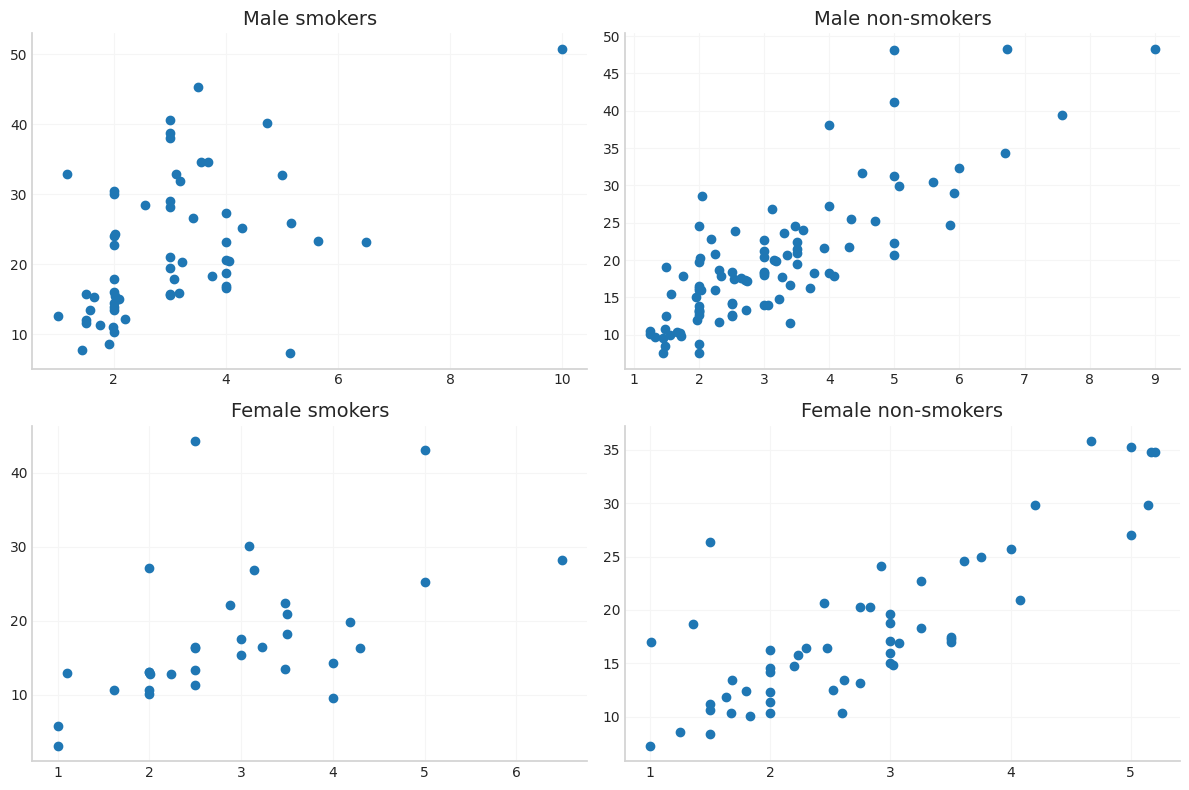

In [31]:
# define a function to create a scatter plot on a given axis
def create_scatter_plot(ax, sex, smoker):
    title = f"{sex} {'non-smokers' if smoker == 'No' else 'smokers'}"
    ax.set_title(title)
    sub_df = tips[(tips["sex"] == sex) & (tips["smoker"] == smoker)]
    ax.scatter(sub_df["tip"], sub_df["total_bill"])

# Creating a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

create_scatter_plot(axes[0, 0], "Male", "Yes")
create_scatter_plot(axes[0, 1], "Male", "No")
create_scatter_plot(axes[1, 0], "Female", "Yes")
create_scatter_plot(axes[1, 1], "Female", "No")

plt.tight_layout()  # this will adjust the spacing between the plots
plt.show()

### 7.3 Ensuring uniform axis limits

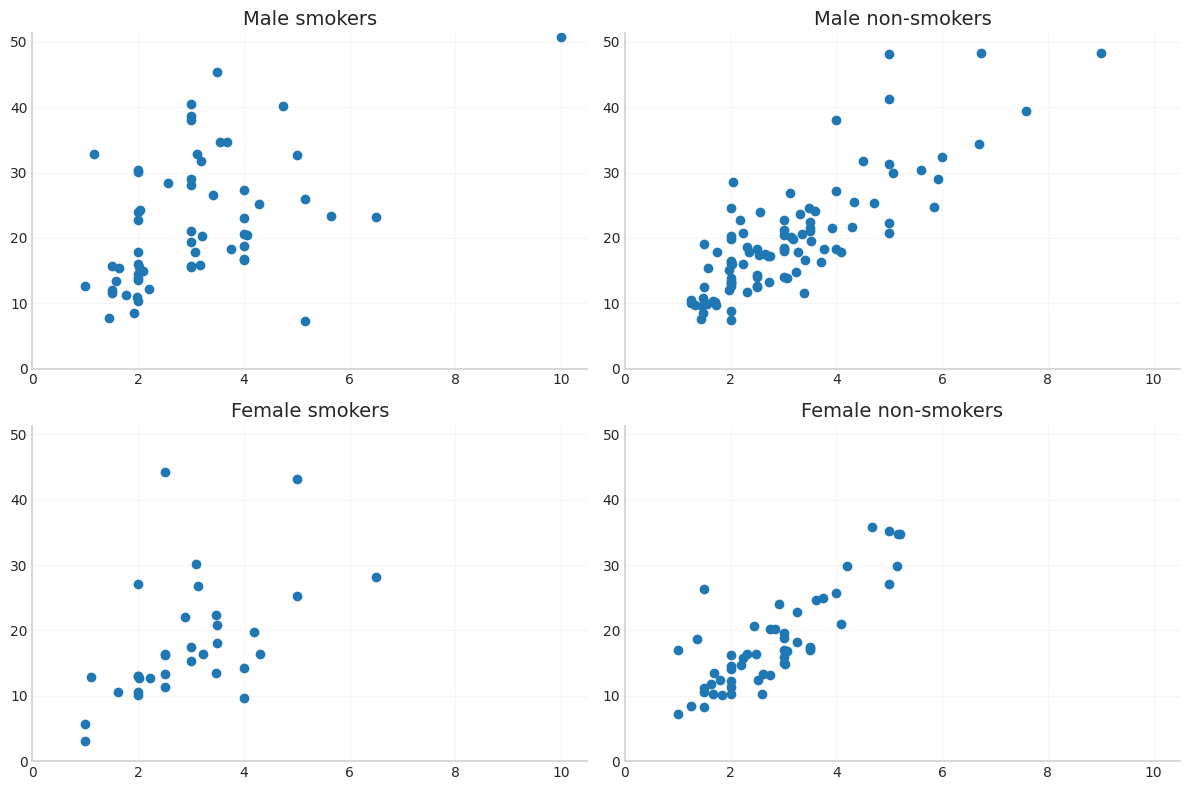

In [32]:
# refine the function the function to allow limits
# define a function to create a scatter plot on a given axis
def create_scatter_plot(ax, sex, smoker, x_limits, y_limits):
    title = f"{sex} {'non-smokers' if smoker == 'No' else 'smokers'}"
    ax.set_title(title)
    sub_df = tips[(tips["sex"] == sex) & (tips["smoker"] == smoker)]
    ax.scatter(sub_df["tip"], sub_df["total_bill"])
    ax.set_xlim(x_limits)
    ax.set_ylim(y_limits)

# Creating a 2x2 grid of subplots using a loop and groupby
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Group the data by sex and smoker status
grouped = tips.groupby(["sex", "smoker"], observed=True)

# Define common axis limits
x_limits = (0.0, tips["tip"].max() + 0.5)
y_limits = (0.0, tips["total_bill"].max() + 0.5)

create_scatter_plot(axes[0, 0], "Male", "Yes", x_limits, y_limits)
create_scatter_plot(axes[0, 1], "Male", "No", x_limits, y_limits)
create_scatter_plot(axes[1, 0], "Female", "Yes", x_limits, y_limits)
create_scatter_plot(axes[1, 1], "Female", "No", x_limits, y_limits)

plt.tight_layout()  # this will adjust the spacing between the plots
plt.show()

## **8. Saving Figures**
You can save your plots as **PNG, PDF, or SVG** using `plt.savefig()`.

In [33]:
# Save the figure as a high-quality image
fig.savefig("passengers_trend.png", dpi=300, bbox_inches="tight")

In [34]:
# even better, store it as a vector graph
fig.savefig("passengers_trend.svg", format="svg", dpi=300, bbox_inches="tight")

### Exercise: Multiple plots in a grid and saving figures
Using the `penguins` dataset, create a 3x1 grid (3 rows, 1 column) with histograms of
`bill_length_mm` for each `species`. Make sure to:
* Use different colors for each species.
* Use the histtype `stepfilled` with a black edge color.
* Add a title and axis labels to each subplot.
* Ensure the X-axis limits are uniform across all subplots.
* add reference lines at the median, and annotate with the respective group-specific value.
Finally, the figure as a PNG file with a resolution of 300 dpi.